#  Titanic Survival Prediction Project 🚢


## Introduction

Due to its accessibility, wealth of characteristics, and historical context, the Titanic dataset makes a great place for both new and seasoned data scientists to start. It enables the implementation of key data science ideas including model selection, feature engineering, and data preparation. It also offers important insights into the elements that contributed to passenger survival during a true historical occurrence.

The Titanic Survival prediction project and Kaggle competition provide a thrilling voyage of discovery, analysis, modelling, and the chance to compete in a real-world machine learning challenge, whether you are new to data science or wanting to hone your abilities.

Let's go out on this thrilling journey to forecast Titanic passenger survival and reveal the data's secret mysteries!



## Project Overview

The Titanic Survival prediction project is divided into a number of crucial stages, each of which adds to the thorough study of the data and the creation of predictive models:


### 1. Data Acquisition and Exploration 📈

The Titanic dataset, which contains a variety of information on passengers, including age, gender, passenger class, and more, is loaded and explored as the project's first step.

### 2. Data Preprocessing and Feature Engineering 🛠️

Data preprocessing involves meticulous handling of missing values, data cleaning, and feature standardization. Feature engineering is performed to create new meaningful variables, such as age groups and passenger titles.

### 3. Data Visualization 📊

Powerful tools like Seaborn and Matplotlib are used to graphically portray the dataset. These visualisations offer in-depth insights into passenger demographics and survival patterns through the use of histograms, line-plots, bar plots, and distribution plots.

### 4. Machine Learning Modeling 🤖

Logistic Regression, Random Forest, K-Nearest Neighbours, Naive Bayes, Decision Tree, and Support Vector Machines (SVM) are just a few of the machine learning models that are used. To forecast passenger survivability, these models undergo extensive training and evaluation.

### 5. Model Evaluation 📉

A range of measures, including accuracy, cross-validation, and confusion matrices, are used to evaluate the performance of the models. For the best outcomes, hyperparameter tuning is used to fine-tune model parameters.

### 6. Insights and Key Findings 🧐

In addition to highlighting the effect of age, gender, passenger class, and title on survival rates, the experiment reveals a number of significant observations. SVM (Radial) and Decision Tree are the two best-performing models.

### 7. Accuracy Analysis 📊

On the test dataset, the accuracy of the chosen models is examined, giving clear insights into the efficacy of the prediction models.

### 8. Submission to Kaggle 🏆

The project is brought to a successful conclusion by skillfully preparing and presenting results to the Kaggle competition, demonstrating the usefulness of the generated models.

## Key Insights 🌟

We get insightful knowledge during the experiment, including the tremendous importance of passenger class, gender, and age in impacting survival rates. The performance of the model is greatly improved by the development of unique features based on passenger titles. Our results' reliability and robustness are guaranteed by careful cross-validation.

The context for a thorough investigation of the Titanic Survival prediction project is created by this introductory review, which places special emphasis on the methodology, findings, and contributions made throughout the analytical and modelling process.

# Dataset Overview

| Feature          | Description                                      |
|------------------|--------------------------------------------------|
| PassengerID      | Unique identifier for each passenger             |
| Pclass           | Passenger class (1st, 2nd, or 3rd)              |
| Name             | Passenger's name                                 |
| Sex              | Passenger's gender                               |
| Age              | Passenger's age                                  |
| SibSp            | Number of siblings/spouses aboard the Titanic    |
| Parch            | Number of parents/children aboard the Titanic    |
| Ticket           | Ticket number                                    |
| Fare             | Passenger's fare                                 |
| Cabin            | Cabin number                                     |
| Embarked         | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


# **1) Importing Main Libraries**

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

# **2) Data Loading**

In [64]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Read CSV test data file into DataFrame
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# preview train data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
print('Shape of Train Dataset: ',train_df.shape)
print('Shape of Test Dataset: ',test_df.shape)

Shape of Train Dataset:  (891, 12)
Shape of Test Dataset:  (418, 11)


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* In the Train dataset a.k.a **train**, we have 891 rows and 12 coloumns
    
    
* In the Test dataset a.k.a **train**, we have 418 rows and 11 coloumns ( Note : there is no target variable into test data (i.e. "Survival" column is missing) )
    
    
* Types of Features:
	- Categorical Feature  =  **Sex,Embarked**
    - Ordinal Feature =  **PClass**
    - Continous Feature = **Age**

<br></br>
# **3) Data Understanding**

## 3.1) Summary Statistics

In [66]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.2) Dataset Info

#### 3.2.1) Train Info

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 3.2.2) Test Info

In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<div class="alert alert-block alert-danger">
<b>Key Findings: </b> 
    
* We can observer that there are missing values in both dataset's

## 3.3) Missing Values in Dataframe

In [69]:
display(train_df.isnull().sum(),test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
print('Missing Percentage values in Age : {}'.format(round(train_df.Age.isnull().sum()/train_df.shape[0]*100)))
print('Missing Percentage values in Cabin : {}'.format(round(train_df.Cabin.isnull().sum()/train_df.shape[0]*100)))
print('Missing Percentage values in Embarked : {}'.format(train_df.Embarked.isnull().sum()/train_df.shape[0]*100))

Missing Percentage values in Age : 20
Missing Percentage values in Cabin : 77
Missing Percentage values in Embarked : 0.22446689113355783


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* We can observer that there are missing values in both dataset's
    
    
* Missing Values in Train Dataset : 
	- Age Feature : 177
 
    - Cabin Feature : 687
    
    - Emabarked : 2
    
    
* Missing Values in Test Dataset : 
	- Age Feature : 86
    
    - Cabin Feature : 327
    
    
* Cabin feature (object) has lot of 77% missing values so imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.
    

* Age feature has 20% missing values 

    
* Embarked feature as like arounf 0.2% which can be imputed with the port where most people boarded.

## 3.4) Data Distribution

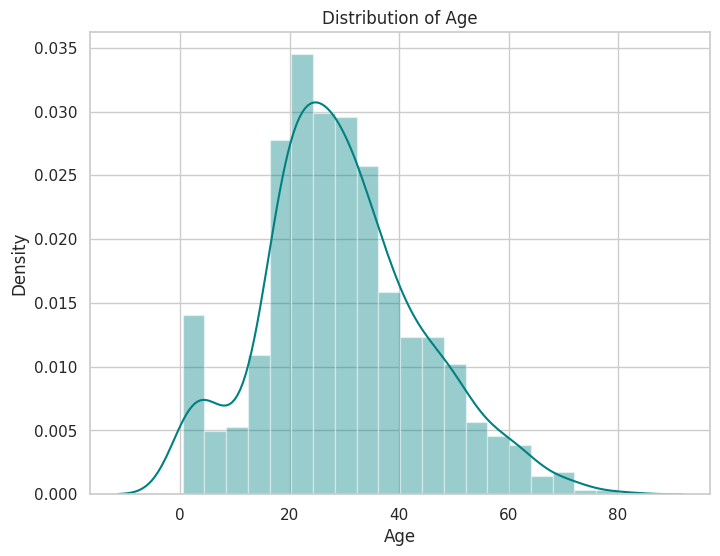

In [71]:
plt.figure(figsize=(8, 6))

# Since age is a continous feature
sns.distplot(train_df["Age"], color='teal', kde=True)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Distribution of Age")
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* The majority of the data in our dataframe are between the ages of 20 and 40.
    
    
* There is a peak in the range of '0', which indicates that there are more babies and infants than young children.
    
    
* And Finally, "Age" is (right) skewed. To deal with this, we'll be imputing the missing values.

<br></br>
# **4) Data Quality & Dealing Missing Values**

Feature by feature, we will address missing values and Feature Engineering.

## **4.1) Age Feature (Continous Feature)**

Due to the continuous nature of the data, interpreting data visualisations will be considerably more complicated and challenging. Therefore, grouping these data points into categories (such as Baby/Infant, Young, Teenage, Adult, Senior, or Old) would make it simple to visualise.
<br></br>

However, certain null or missing values in the data prevent categorization. Therefore, we will label the data for it with the temporary value (-0.5). The label "unkown" is used to fill in missing values when none exist. As we are categorising values in the labels above, I'll be taking the prefix name (i.e. Mr, Mrs, Miss, Doct, Don, etc.) of those missing values and assuming that it can help me find the correct age category so I'll then be finding the mode of that age values in that category and replacing those age values of -0.5 with mode.
<br></br>
* STEPS:

	1) Categorizing into 'Age_Group'
    
    2) Name Prefix age guessing

### 4.1.1) Feature Engineering

In [72]:
train_df.Age.fillna(-0.5,inplace=True)
test_df.Age.fillna(-0.5,inplace=True)

In [73]:
# Categorizing age into groups
bins= [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

train_df['Age_Group'] = pd.cut(train_df.Age,bins,labels = labels)
test_df['Age_Group'] = pd.cut(train_df.Age,bins,labels = labels)
train_df.Age_Group.unique()

['Student', 'Adult', 'Young Adult', 'Unknown', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

### 4.1.2) Missing Values

Let's add a new feature named "Prefix" to our dataframe, which will be the first letter or prefix of their names.

In [74]:
datasets = [train_df,test_df] # we want changes to both training and testing datasets 
for dataset in datasets:
    dataset['Prefix'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

train_df.Prefix.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

<div class="alert alert-block alert-warning">
<b>However : </b> In order to move further, let's combine several prefixes as they have so many different initials. 
</div>

In [75]:
for dataset in datasets:
    dataset['Prefix'] = dataset['Prefix'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Prefix'] = dataset['Prefix'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Prefix'] = dataset['Prefix'].replace(['Mile','Ms'],'Miss')
    dataset['Prefix'] = dataset['Prefix'].replace(['Mme'],'Mrs')
    
print(train_df.Prefix.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare' 'Royal' 'Mlle']


Good. Let's now add values to the Age features that we assigned -0.5 or the Unknown label for.

In [76]:
for prefix in train_df['Prefix'].unique():
    median_age = train_df[(train_df['Prefix'] == prefix) & (train_df['Age_Group'] != 'Unknown')]['Age'].median()
    train_df.loc[(train_df['Prefix'] == prefix) & (train_df['Age_Group'] == 'Unknown'), 'Age'] = median_age
    
    
for prefix in test_df['Prefix'].unique():
    median_age = train_df[(train_df['Prefix'] == prefix) & (train_df['Age_Group'] != 'Unknown')]['Age'].median()
    train_df.loc[(train_df['Prefix'] == prefix) & (train_df['Age_Group'] == 'Unknown'), 'Age'] = median_age

Change the age group to the appropriate category immediately.

In [77]:
bins= [0,5,12,18,24,35,60,np.inf]
labels = ['Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

train_df['Age_Group'] = pd.cut(train_df.Age,bins,labels = labels)

Removing Prefix Feature

In [78]:
train_df = train_df.drop('Prefix',axis=1)
test_df = test_df.drop('Prefix',axis=1)

## **4.2) Cabin Feature**

As we know, since 77% of the records are missing, it is probably not a good idea to impute data and use this variable for prediction. This variable won't be used in our model, so rather keeping it lets drop it from out from dataframe.

In [79]:
train_df.drop(['Cabin'],axis=1,inplace=True)
test_df.drop(['Cabin'],axis=1,inplace=True)

Good, we have sucesfully removed 'Cabin' feature from both train and test dataset

## **4.3) Embarked Feature (Categorical Feature)**

In [80]:
region = ['Southampton (S)','Cherbourg (C)','Queenstown (Q)']
for i in range(0,3):
    print('Number of people embarking in {} : {}'.format(region[i],train_df[train_df.Embarked==train_df.Embarked.unique()[i]].shape[0]))

Number of people embarking in Southampton (S) : 644
Number of people embarking in Cherbourg (C) : 168
Number of people embarking in Queenstown (Q) : 77


By far the most passengers boarded in Southhampton, thus we will can use mode of 'Embarked' (which will be 'S') or just simply 'S'  ; to impute in the embarked feature.

In [81]:
train_df.fillna({'Embarked':'S'},inplace=True)
# we won't use fillna in test dataframe, because we dont miss any values of Embarked in test dataset

## **4.4) Fare Feature**

Now that we've taken a closer look at this trait, we can say with certainty that it has nothing to do with survival. So we wil be dropping this feature from dataframe

In [82]:
train_df = train_df.drop('Fare',axis=1)
test_df = test_df.drop('Fare',axis=1)

## **4.5) PassengerID Feature**

Similarly, PassendgerID has no bearing on the likelihood of survival. Soo we will be dropping 'PassengerID'

In [83]:
train_df = train_df.drop('PassengerId',axis=1)
 #test_df = test_df.drop('PassengerId',axis=1)

## **4.6) Name Feature**

Name Feature is also being dropped since it is nothing more than a collection of strings with no meaning or connection to our analysis and model development.

In [84]:
train_df = train_df.drop('Name',axis=1)
test_df = test_df.drop('Name',axis=1)

## **4.7) Ticket Feature**

Name Feature is also being dropped since it is nothing more than a collection of strings with no meaning or connection to our analysis and model development.

In [85]:
train_df = train_df.drop('Ticket',axis=1)
test_df = test_df.drop('Ticket',axis=1)

In [86]:
train_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Embarked     0
Age_Group    0
dtype: int64

<div class="alert alert-block alert-success">
<b>Success:</b> Sweet after we thoroughly cleaning and removing some features in the data, lets zoom to data visualisation.
</div>

<br></br>
<a id="idq"> 
# **5) Data Visualization**
</a>

## 5.1) Age Analysis

### 5.1.1) Age Group Distribution

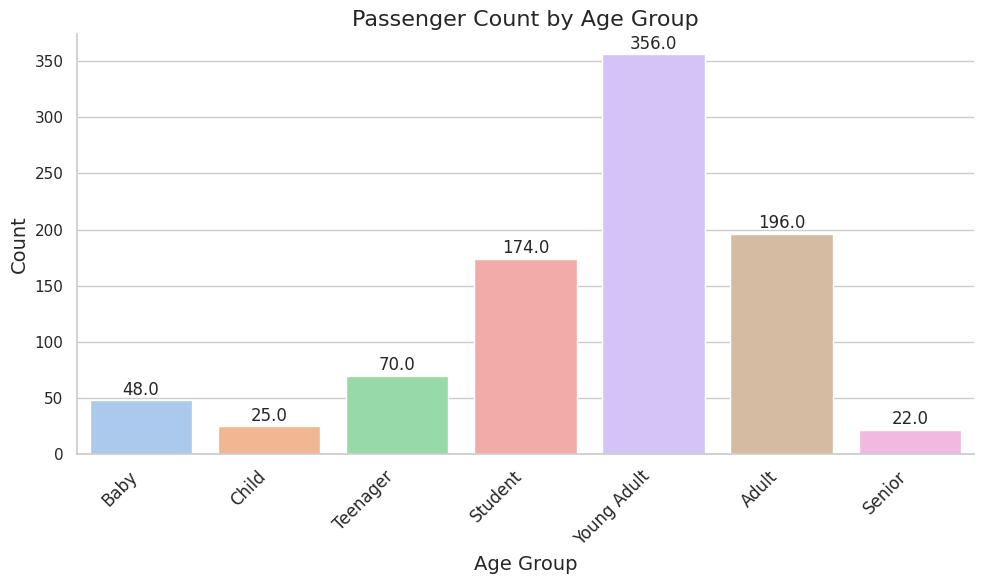

In [87]:
custom_palette = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=train_df, x='Age_Group', palette=custom_palette, ax=ax)

ax.set_xlabel("Age Group", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Passenger Count by Age Group", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

# Adding Labels in Bar 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='baseline', fontsize=12)

# Removing top and right spines for a cleaner look (optional)
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Young Adults Dominant : The largest passenger group falls into the "Young Adult" category, indicating that a significant portion of the passengers were in the age range of approximately 24 to 35 years.
    

* Children and Babies : The categories "Child" and "Baby" have lower counts, indicating that there were relatively fewer children and infants on board.
    

* Seniors : The "Senior" category has the fewest passengers, suggesting that elderly individuals were a minority among the passengers.
    
    
* Balanced Age Distribution : The age distribution appears relatively balanced across the other age groups ("Teenager," "Student," and "Adult"), indicating a diverse group of passengers in these categories.

### 5.1.2) Age group survival count

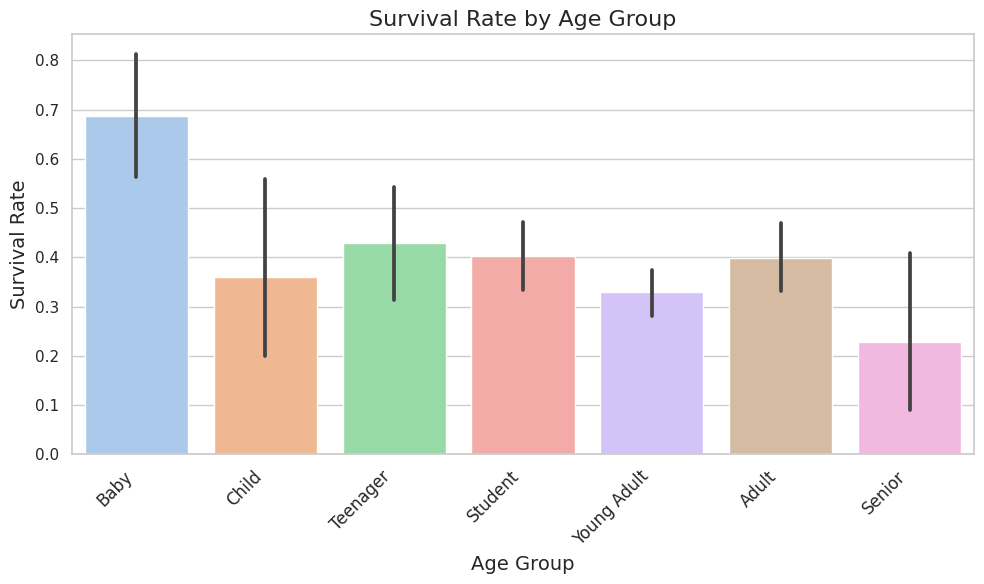

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Age_Group', y='Survived', palette='pastel')

plt.xlabel("Age Group", fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.ylabel("Survival Rate", fontsize=14)
plt.title("Survival Rate by Age Group", fontsize=16)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 

    
* Children Had the best Survival Rate : Of all the age groups, "Baby" and "Child" had the best survival rates. This shows that kids had a greater probability of surviving, especially babies and young kids.

    
* Young adults and Seniors Had worse Survival Rates : The "Senior" age category had the lowest survival rate, suggesting that senior passengers had a worse chance of surviving. In addition, compared to children, the "Young Adult" age group also had a considerably lower survival rate.

    
* Teenager and Student Age Groups Had Mixed Survival Rates : Some passengers in the "Teenager" and "Student" age groups survived, but others did not. These groups have a more even range of survival rates.

## 5.2) Gender Analysis

### 5.2.1) Survivors and Non-Survivors by Gender

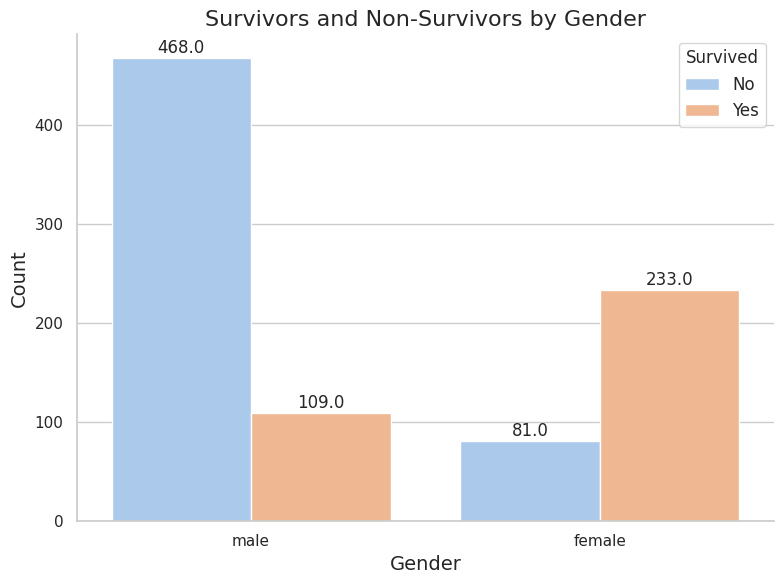

In [89]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Sex', hue='Survived', palette='pastel')

plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Survivors and Non-Survivors by Gender", fontsize=16)
plt.legend(title="Survived", labels=["No", "Yes"], title_fontsize=12, fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)

sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 

* Gender and Survival: The countplot with hue reveals the distribution of survivors and non-survivors by gender, highlighting the difference in survival rates between males and females.


* Higher Female Survival: The plot clearly shows that a larger proportion of females survived compared to males. Gender appears to be a significant factor in determining survival on the Titanic.

### 5.2.2) Age Distribution by Gender & Survival

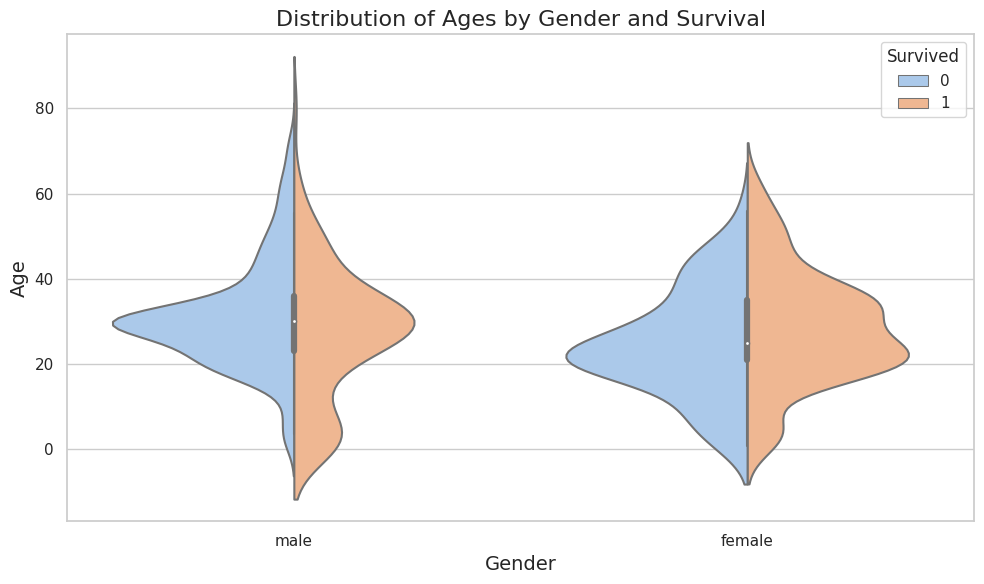

In [90]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=train_df, x='Sex', y='Age', hue='Survived', palette='pastel', split=True)

plt.xlabel("Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.title("Distribution of Ages by Gender and Survival", fontsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 

* Age and gender are both represented by the violin plot, which shows how old each gender is on average. Within each gender category, the distribution of ages for survivors (1) and non-survivors (0) is shown separately.


* For males, ageing reduces the likelihood of survival.It implies that precedence for boarding lifeboats is given to ladies, seniors, and babies/infants

### 5.2.3) Sex Distribution by Age-Group

* Gender Distribution by Age Group: The countplot with hue categorizes passengers into age groups and further divides them by gender (Sex). This allows you to visualize the distribution of male and female passengers within each age category.

* Variation Across Age Groups: The plot shows how the distribution of genders varies across different age groups. It helps you understand the gender composition within each age category.

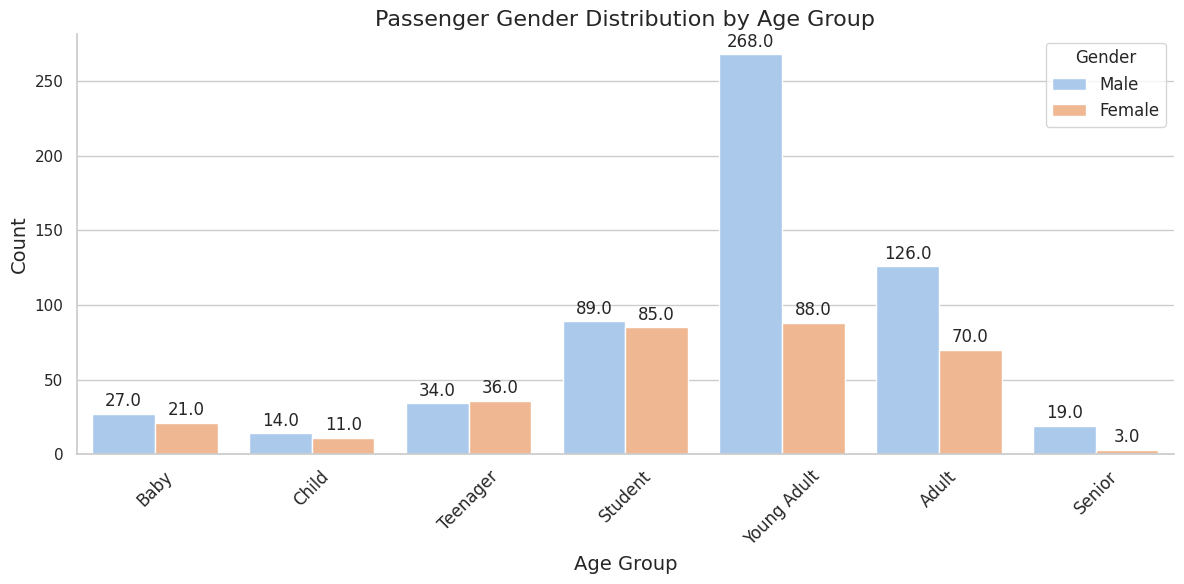

In [91]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=train_df, x='Age_Group', hue='Sex', palette='pastel')
plt.xlabel("Age Group", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Gender Distribution by Age Group", fontsize=16)
plt.legend(title="Gender", title_fontsize=12, fontsize=12, loc='upper right', labels=["Male", "Female"])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 

* Males have a lower likelihood of surviving than females, as seen in 5.2.1, and thus make up the majority of data for the Younf adult group. which were the cause of the decreased survival rates for young adults that we observed in 5.1.2

### 5.2.4) Sex Distribution by Embarked

* Embarkation Points: The countplot categorizes passengers by their embarkation point, which includes "S" (Southampton), "C" (Cherbourg), and "Q" (Queenstown). This distribution shows the number of passengers from each location.


* Gender Distribution: The plot further divides passengers at each embarkation point by gender (male and female) using different colors. It allows us to visualize the gender composition for each embarkation point.



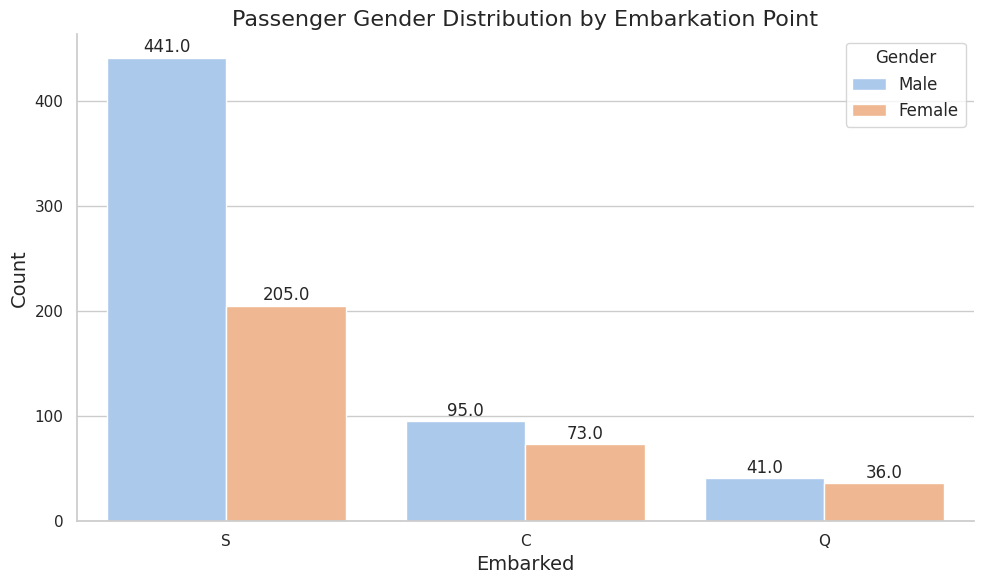

In [92]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_df, x='Embarked', hue='Sex', palette='pastel')

plt.xlabel("Embarked", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Gender Distribution by Embarkation Point", fontsize=16)
plt.legend(title="Gender", title_fontsize=12, fontsize=12, loc='upper right', labels=["Male", "Female"])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

## 5.3) Passenger Class Analysis

### 5.3.1) Passenger Class Distribution 

Passenger Class Distribution: The countplot categorizes passengers into different passenger classes (1st Class, 2nd Class, and 3rd Class) based on the "Pclass" feature. This distribution shows the number of passengers in each class.

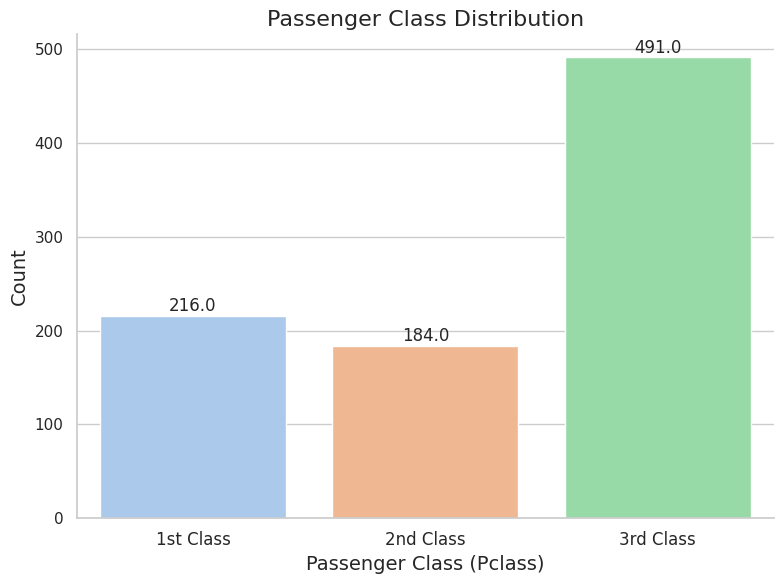

In [93]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Pclass', palette='pastel')

plt.xlabel("Passenger Class (Pclass)", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Class Distribution", fontsize=16)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* The plot reveals a class imbalance among passengers. The majority of passengers were in the 3rd Class, while the 1st and 2nd Classes had fewer passengers. This suggests that the Titanic had a larger number of passengers traveling in lower-class accommodations.

### 5.3.2) Paassenger Class Distribution by Age Group

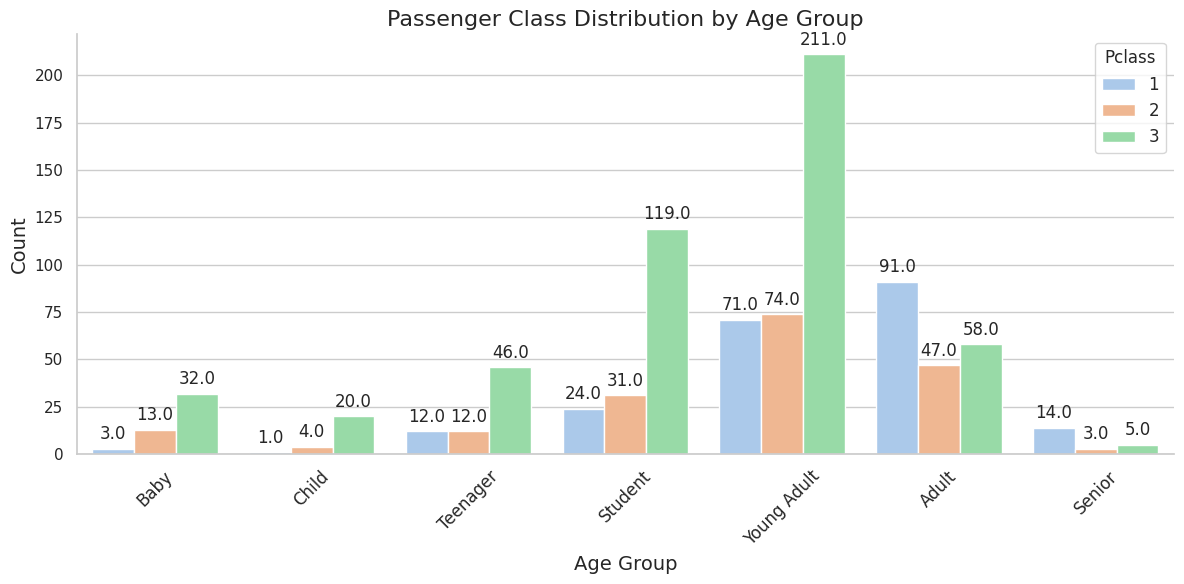

In [94]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=train_df, x='Age_Group', hue='Pclass', palette='pastel')

plt.xlabel("Age Group", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Class Distribution by Age Group", fontsize=16)
plt.legend(title="Pclass", title_fontsize=12, fontsize=12, loc='upper right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* As we already know, young adults make up the majority of our datasets' age groups and typically preferred 3rd class; nevertheless, most adults and seniors preferred 1 or 2nd class over 3rd class.


* The clear distinction in passenger counts among the classes highlights the social stratification that existed on the Titanic. The 1st Class had a smaller but more privileged passenger group, whereas the 3rd Class had a larger but less affluent passenger group.

### 5.3.3) Paassenger Gender Distribution by Class

First Class, Second Class, and Third Class are the three passenger classes that are distinguished in the plot by separate bars. It further differentiates between male and female passengers within each class by employing various colours.

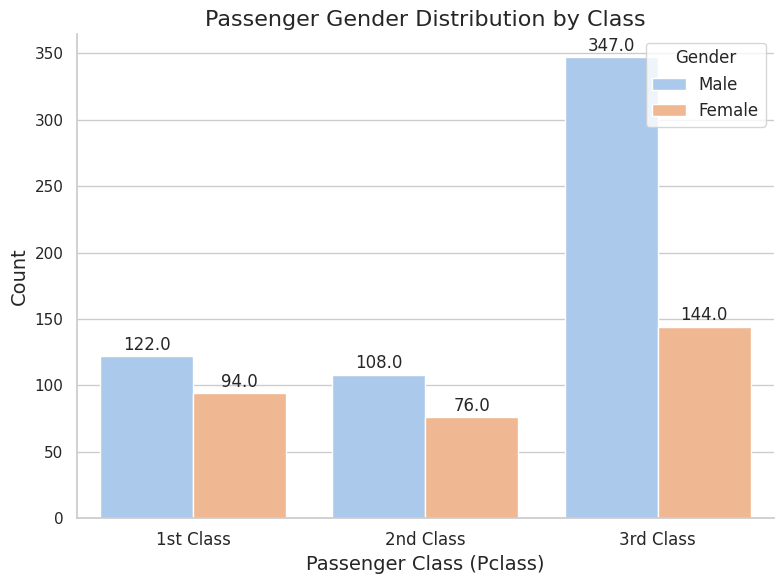

In [95]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Pclass', hue='Sex', palette='pastel')

plt.xlabel("Passenger Class (Pclass)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Gender Distribution by Class", fontsize=16)
plt.legend(title="Gender", title_fontsize=12, fontsize=12, loc='upper right', labels=["Male", "Female"])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], fontsize=12)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* The majority of data indicates that working men who support their families purchase a ticket in third class together with their partners.

### 5.3.4) Survival Rate by Passenger Class

Survival Rate by Class: The barplot illustrates the survival rates for passengers in different passenger classes (1st Class, 2nd Class, and 3rd Class). It allows for a direct comparison of survival rates among the classes.

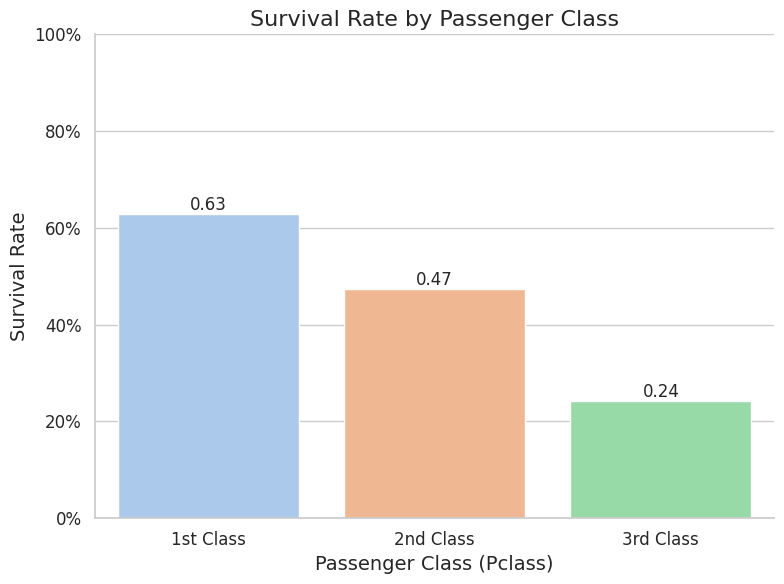

In [96]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=train_df, x='Pclass', y='Survived', palette='pastel', ci=None)
plt.xlabel("Passenger Class (Pclass)", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], fontsize=12)
plt.ylabel("Survival Rate", fontsize=14)
plt.title("Survival Rate by Passenger Class", fontsize=16)

plt.ylim(0, 1)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* The plot clearly shows that passengers in the 1st Class had the highest survival rate, followed by the 2nd Class, while the 3rd Class had the lowest survival rate. This suggests a significant correlation between passenger class and survival.
    

* This may be the cause of the poor observed survival rates for students and young adults/teenagers.
    

* First Class was designed to be erected on top of the ships, allowing for early and simple evacuation from journey.

### 5.3.5) Passenger Class Distribution by Embarkation Point

The countplot splits passengers into groups based on where they boarded the aircraft (Southampton, Cherbourg, Queenstown), and then further groups them into passenger classes (First Class, Second Class, and Third Class). This distribution enables you to determine the specific class by observing city dwellers' increasing wealth and socioeconomic disparities.

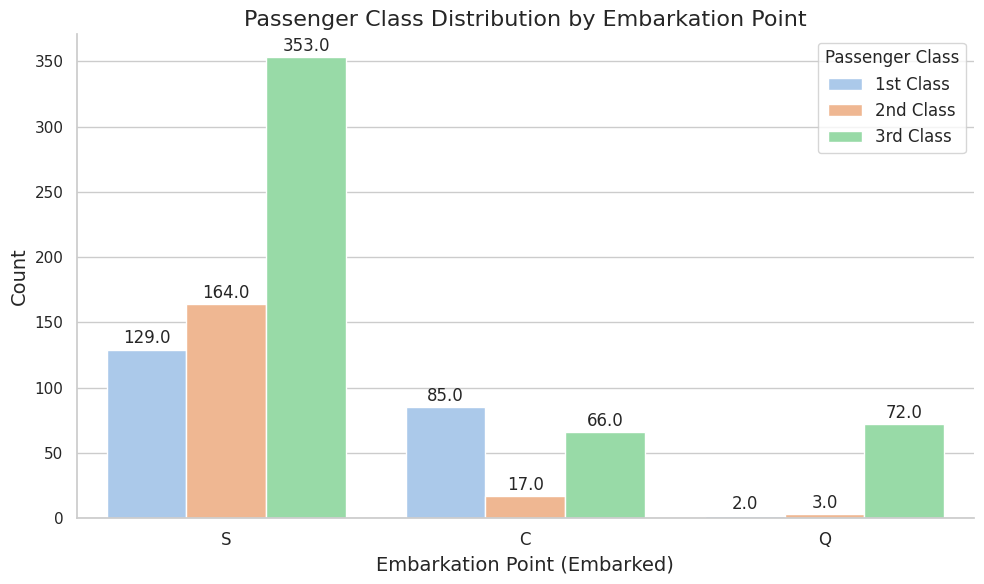

In [97]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=train_df, x='Embarked', hue='Pclass', palette='pastel')

plt.xlabel("Embarkation Point (Embarked)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Class Distribution by Embarkation Point", fontsize=16)
plt.legend(title="Passenger Class", title_fontsize=12, fontsize=12, loc='upper right',
           labels=["1st Class", "2nd Class", "3rd Class"])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* The plot focuses on trends in the distribution of passengers by class and embarkation place. For instance, Cherbourg had a disproportionately higher percentage of passengers travelling in First Class, whereas Southampton had the most passengers overall.People in Queenstown take third class because of the much lower social and economic power there. 

### 5.3.6) Survival Rate of All Classes of Passenger Embarking from Different Points 

Survival Rate by Embarkation Point and Passenger-Class: The barplot visualizes the survival rates for passengers from different embarkation points (Southampton, Cherbourg, Queenstown) while considering passenger class (1st Class, 2nd Class, 3rd Class) as the hue. It allows for comparisons of survival rates across both embarkation points and classes.

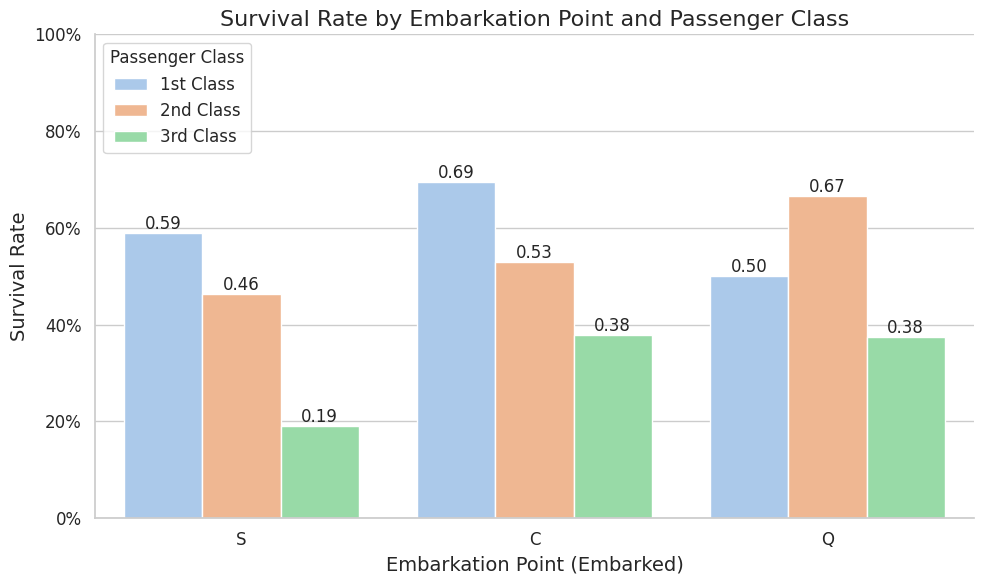

In [98]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_df, x='Embarked', y='Survived', hue='Pclass', palette='pastel', ci=None)


plt.xlabel("Embarkation Point (Embarked)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Survival Rate", fontsize=14)
plt.title("Survival Rate by Embarkation Point and Passenger Class", fontsize=16)


plt.ylim(0, 1)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(title="Passenger Class", title_fontsize=12, fontsize=12, loc='upper left',
           labels=["1st Class", "2nd Class", "3rd Class"])
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


## 5.4) Embarked Feature Analysis

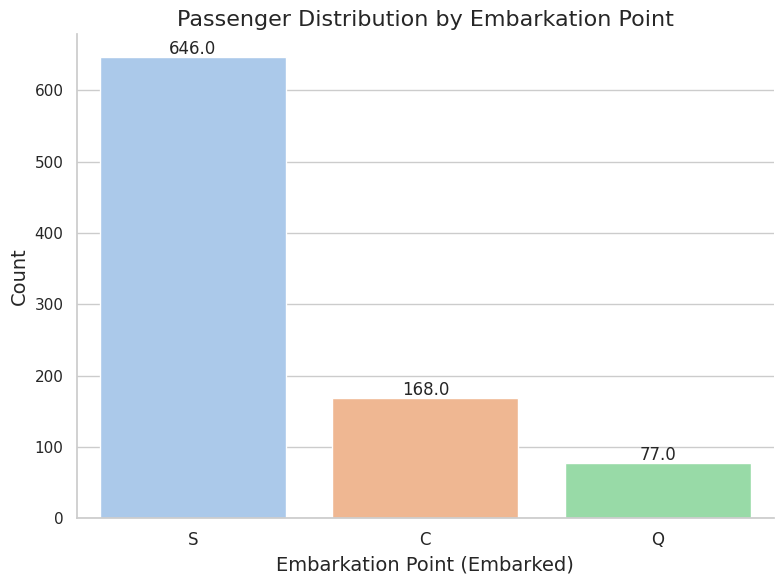

In [99]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Embarked', palette='pastel')

plt.xlabel("Embarkation Point (Embarked)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Distribution by Embarkation Point", fontsize=16)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)
    
plt.xticks(fontsize=12)
sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

### 5.4.1) Survival Rate for Emabarking Point

The barplot divides passengers into groups based on where they boarded the ship (Southampton, Cherbourg, or Queenstown) on the x-axis, and on the y-axis, it displays the appropriate survival rate.

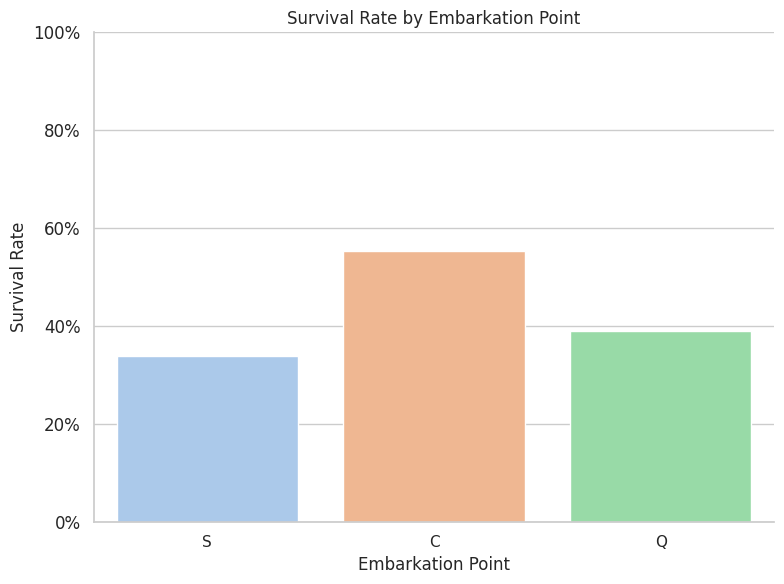

In [100]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Embarked', y='Survived', palette='pastel', ci=None)

plt.xlabel("Embarkation Point")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Embarkation Point")

plt.ylim(0, 1)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* It appears that those who boarded in Cherbourg (C) had a greater chance of surviving than those who boarded at Southampton (S) and Queenstown (Q). This implies that the location of departure could have had some bearing on survival.

### 5.4.2) Passenger Class VS  Embarkation Point VS  Age Group

* Left Subplot (Countplot):

	- Title: "Passenger Count by Embarkation Point and Age Group"


* Right Subplot (Barplot with Survival Rate):

	- Title: "Survival Rate by Embarkation Point and Age Group"

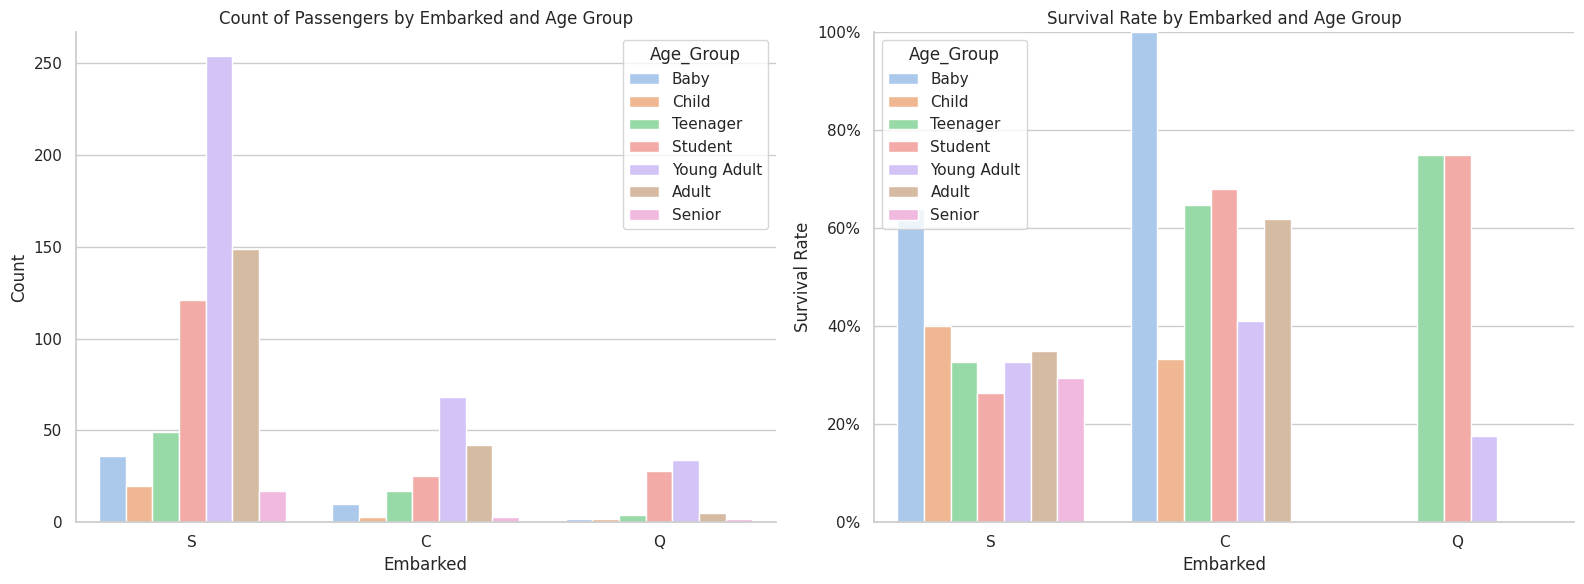

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=train_df, x='Embarked', hue='Age_Group', palette='pastel', ax=axes[0])
axes[0].set_xlabel("Embarked")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Passengers by Embarked and Age Group")

sns.barplot(data=train_df, x='Embarked', y='Survived', hue='Age_Group', palette='pastel', ax=axes[1],ci=None)
axes[1].set_xlabel("Embarked")
axes[1].set_ylabel("Survival Rate")
axes[1].set_title("Survival Rate by Embarked and Age Group")

# Customize y-axis labels to show percentages
axes[1].set_ylim(0, 1)
axes[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[1].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

sns.despine(right=True, top=True, ax=axes[0])
sns.despine(right=True, top=True, ax=axes[1])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* Left Subplot (Countplot - Passenger Count by Embarkation Point and Age Group):
    
    * Age Group Influence of Embarkation Point: The left subplot shows how the age group distribution differs between embarkation ports. For instance, Cherbourg (C) appears to have a higher percentage of young adults, but Southampton (S) appears to have more students. This raises the possibility that passenger demographics may have been impacted by embarkation places.
    
    * Age Group Diversity: The countplot shows the range of ages among passengers from various sites of departure. Understanding this variety might be important for future study since it may reveal differences in passengers' socioeconomic origins or trip objectives.
    
    
* Right Subplot (Barplot with Survival Rate - Survival Rate by Embarkation Point and Age Group):
    
    * Survival Rate Patterns: The right subplot sheds light on the ways in which survival rates vary according to age group and site of embarkation. Notably, Cherbourg (C) seems to have greater survival rates across the majority of age categories, suggesting that passengers sailing from Cherbourg had a higher chance of surviving.
    
    * Age Group Influence on Survival: The barplot enables us to draw the conclusion that age groupings affected survival results. For instance, across all embarkation ports, young people and adults often had higher survival rates than other age groups.
    
    * Cherbourg Exception: Cherbourg stands out with continuously greater percentages of survival, indicating that characteristics particular to passengers from Cherbourg may have contributed to their increased odds of surviving, regardless of age group.

### 5.4.3) Survival Rate by Passenger Class,Gender & Embarked Point

<Figure size 1200x600 with 0 Axes>

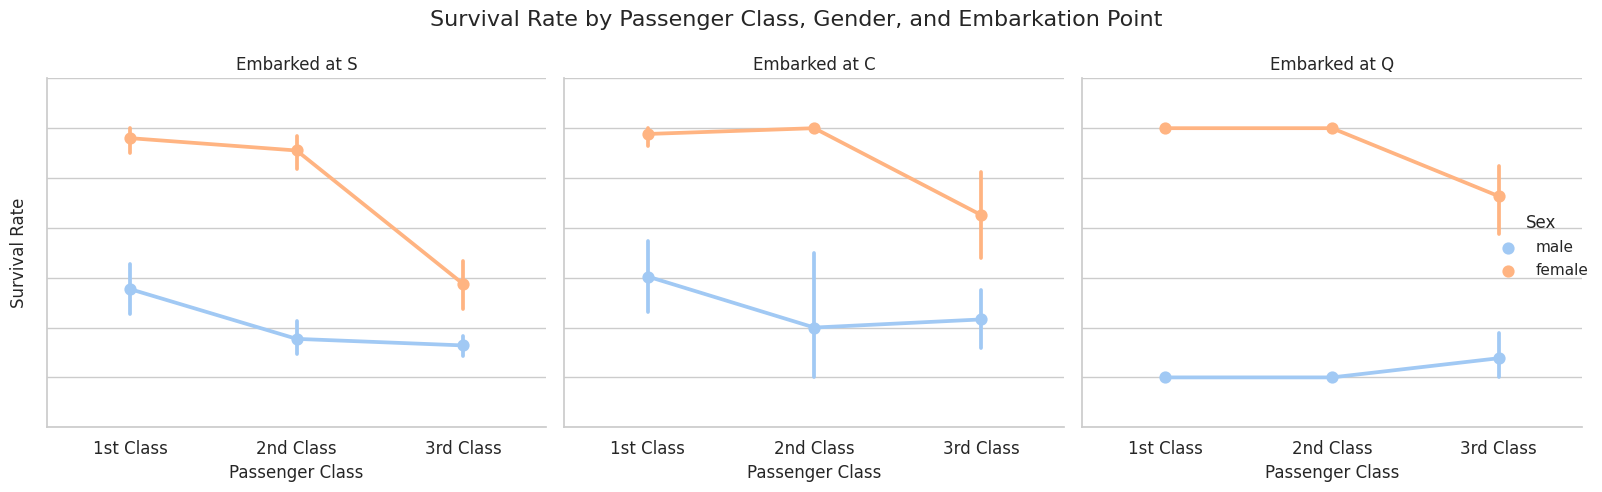

In [102]:
plt.figure(figsize=(12, 6))

catplot = sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df, kind='point', palette='pastel')

catplot.fig.subplots_adjust(top=0.85)
catplot.fig.suptitle('Survival Rate by Passenger Class, Gender, and Embarkation Point', fontsize=16)
catplot.set_axis_labels("Passenger Class", "Survival Rate")
catplot.set_xticklabels(["1st Class", "2nd Class", "3rd Class"], fontsize=12)
catplot.set_yticklabels(fontsize=12)
catplot.set_titles("Embarked at {col_name}", fontsize=14)


plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
* The survival chances are almost 1 for women for 1st Class and 2nd Class irrespective of the Pclass.

    
* Southampton looks to be very unlucky for 3rd Class Passenegers as the survival rate for both men and women is very low.(Money Matters ;) )
    

* Queenstown looks looks to be unlukiest for Men, as almost all were from 3rd Class.

## 5.5) SibSip Feature Analysis

### 5.5.1) Passenger Count by Number of Siblings/Spouses

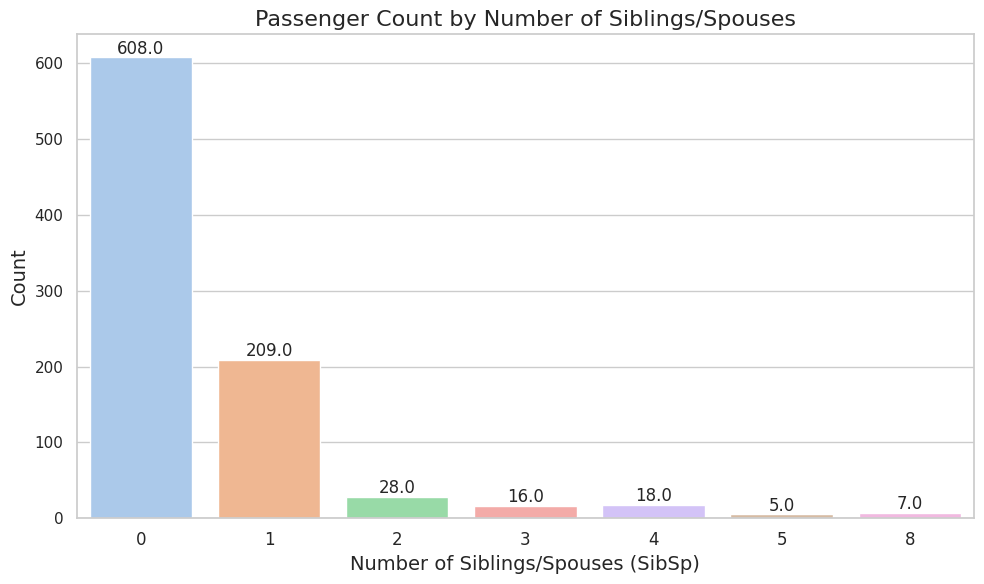

In [103]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=train_df, x='SibSp', palette='pastel')
plt.xlabel("Number of Siblings/Spouses (SibSp)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Count by Number of Siblings/Spouses", fontsize=16)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 5),
                ha='center', va='baseline', fontsize=12)
plt.tight_layout()
plt.show()

### 5.5.2) Survival Rate by Number of Siblings/Spouses

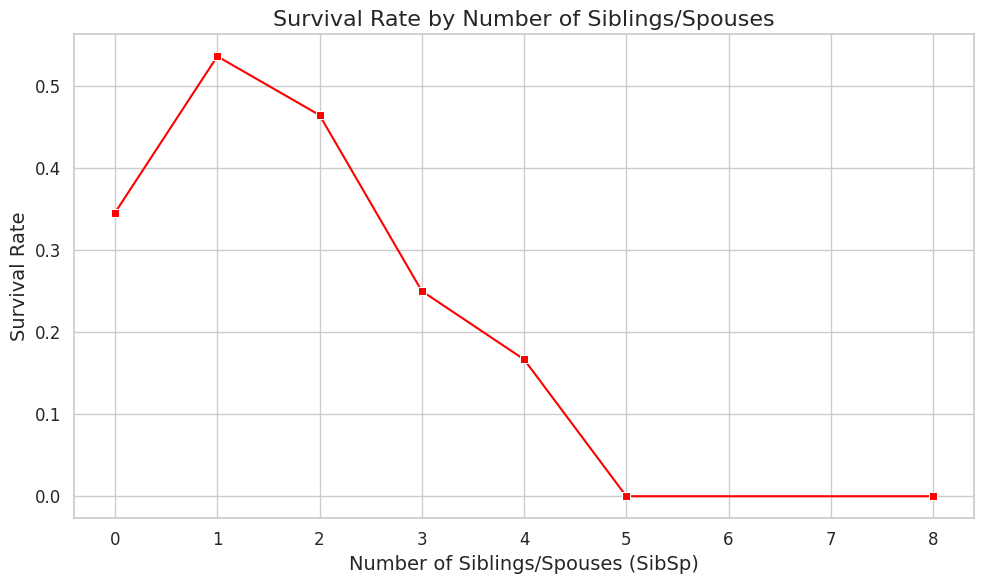

In [104]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='SibSp', y='Survived', data=train_df, marker='s', color='Red',ci=None)

plt.xlabel("Number of Siblings/Spouses (SibSp)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Survival Rate", fontsize=14)
plt.yticks(fontsize=12)
plt.title("Survival Rate by Number of Siblings/Spouses", fontsize=16)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    

* Effect of Family Size on Survival: The factorplot shows how a passenger's odds of survival were affected by how many siblings or spouses they had (SibSp). It gives a clear picture of how survival rates fluctuated depending on family size.
    

* Smaller Families Have a Better probability of Surviving: Passengers with fewer siblings or spouses (SibSp = 0 or SibSp = 1) typically had a better probability of surviving than those from bigger families. This shows that travellers who were travelling in a smaller family circle had a higher chance of surviving.
    

* There are various exceptions and deviations to the general trend that larger families have lower survival chances. As an instance, SibSp = 3 passengers have an unusually high chance of surviving, which might be because of specific circumstances or demographics within this group.

## 5.6) Parch (Parents/Children) Feature Analysis

### 5.6.1) Passenger Count by Number of Parents/Children

Influence of Family Size on Survival: This illustrates how the number of parents or children a passenger had (Parch) influenced their chances of survival. It provides a clear overview of how survival rates varied across different family sizes.


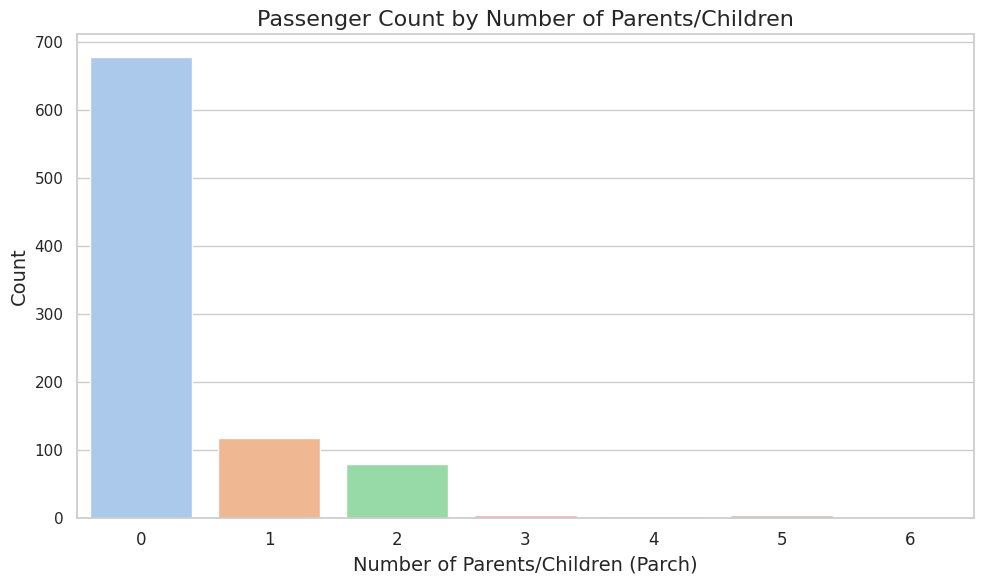

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Parch', palette='pastel')


plt.xlabel("Number of Parents/Children (Parch)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Passenger Count by Number of Parents/Children", fontsize=16)

plt.tight_layout()
plt.show()

### 5.6.2) Survival Rate by Number of Parents/Children

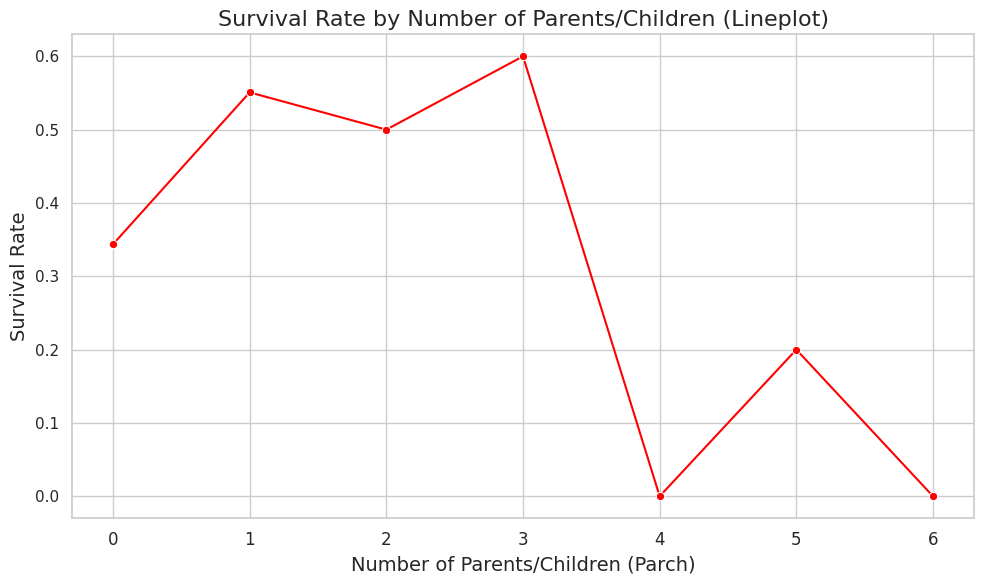

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='Parch', y='Survived', marker='o', ci=None, color='red')

plt.xlabel("Number of Parents/Children (Parch)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Survival Rate", fontsize=14)
plt.title("Survival Rate by Number of Parents/Children (Lineplot)", fontsize=16)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    

* Smaller Families Have a Better probability of Surviving: In general, passengers with smaller families—Parch = 0 or Parch = 1—had a better probability of surviving than those with bigger families. This shows that travellers who were travelling in a smaller family circle had a higher chance of surviving.

    
* The impact of family size in determining survival outcomes is shown by this visualisation. It suggests that the likelihood of a passenger surviving was impacted not just by personal traits but also by whether they were travelling with relatives.

### 5.6.3) Distribution of Passenger Class (Pclass) by Number of Parents/Children (Parch)

In [107]:
crosstab = pd.crosstab(train_df.Parch, train_df.Pclass)
styled_crosstab = crosstab.style.background_gradient(cmap='summer_r')
styled_crosstab

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    
    
* Parch = 0: The majority of travellers who were travelling alone or without children (Parch = 0) occupied third-class (Pclass 3) accommodations. This shows that many passengers who travelled alone or who did not have direct family aboard belonged to a lower social stratum.


* Balanced Distribution in Pclass 1 and 2: There is a somewhat balanced distribution for travellers with small families (Parch = 1 or Parch = 2). This suggests that there was not a significant prejudice against any particular class for travellers with one or two parents/children.


* Parch > 2 in Pclass 3: The third-class cabins (Pclass 3) are typically occupied by travellers with bigger families (Parch > 2). This suggests that bigger families frequently travelled in lower-class lodgings.


* Passengers travelling with one or two parents/children (Parch = 1 or Parch = 2) were more evenly divided throughout the first-class (Pclass 1) and second-class (Pclass 2) cabins (see Pclass 1 and Pclass 2 for Smaller Families). This implies that smaller families had a class preference.


## 5.5) Correlation Analysis

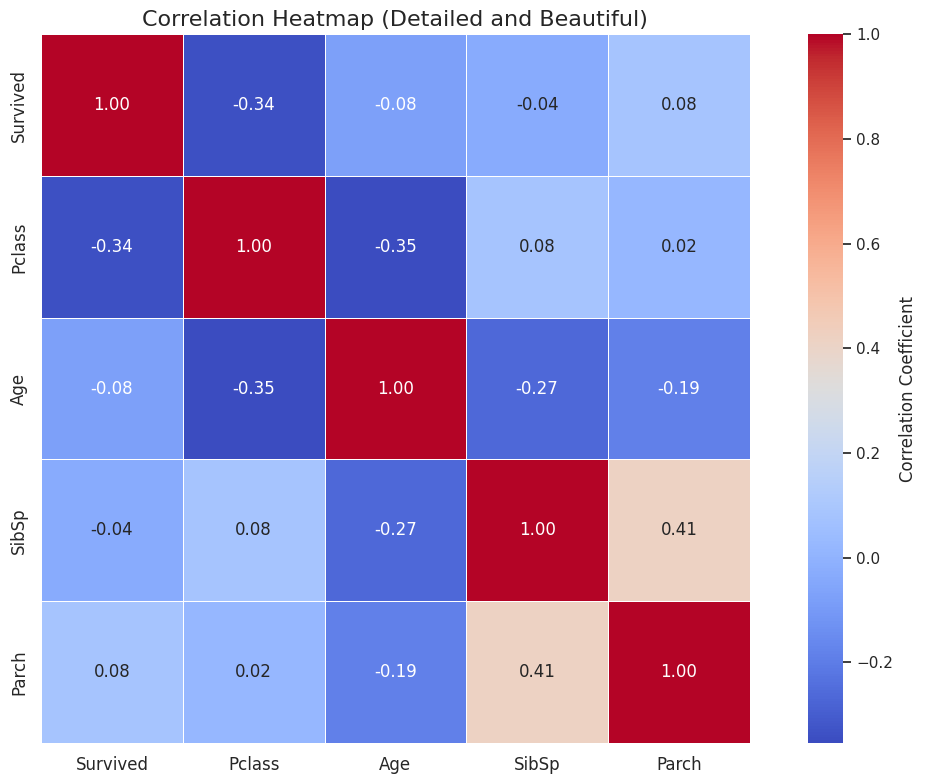

In [108]:
corr_matrix = train_df.drop(['Sex','Embarked','Age_Group'],axis=1).corr()
plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap (Detailed and Beautiful)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key Findings: </b> 
    


* Since it is evident that we cannot correlate across alphabets or strings, only the numerical properties are compared in the first place. Let's examine association in more detail before attempting to comprehend the plot.
   
    
    
* Positive correlation exists between two features if an increase in feature A causes an increase in feature B. Perfect positive correlation is represented by a value of 1.And a feature A and feature B are said to be negatively associated if an increase in feature A causes a reduction in feature B. Perfect negative correlation has a value of -1.


* So, given that one of them is unnecessary, do you believe we should employ both of them? Reducing redundant features during model creation or training has various benefits, including shorter training times. We can now observe from the heatmap that there is little correlation between the characteristics. SibSp and Parch have a 0.41 correlation coefficient, which is the highest. Therefore, we may continue using all features.


# **6) Data Pre-Processing**

* The Kaggle data dictionary identifies SibSp and Parch as having a connection to family travel. I'll aggregate the impact of these factors into one categorical predictor, whether or not that person was travelling alone, for simplicity's sake (and to account for any multicollinearity).

* Secondly, I'll be droping the "Age_Group" Feature from training as well as testing.

* And finally, I'll use pd.dummy to convert categorical variables to numerical forms, such as (Sex, Pclass, Embarked).

In [109]:
# ----->> Training Dataframe <<-------

train_data = train_df.copy()

# Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

# Drop unnecessary columns
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

# Perform one-hot encoding
training = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop(['Sex_female','Age_Group'], axis=1, inplace=True)

# Assign the final DataFrames
final_train = training
final_train.head()

,Survived,Age,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,0,False,False,True,False,False,True,True
1,1,38.0,0,True,False,False,True,False,False,False
2,1,26.0,1,False,False,True,False,False,True,False
3,1,35.0,0,True,False,False,False,False,True,False
4,0,35.0,1,False,False,True,False,False,True,True


In [110]:
# ----->> Testing Dataframe <<-------

test_data = test_df.copy()

# Create categorical variable for traveling alone
test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)


# Drop unnecessary columns
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)


# Perform one-hot encoding
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop(['Sex_female','Age_Group'], axis=1, inplace=True)

# Assign the final DataFrames
final_test = testing
final_test.head()

,PassengerId,Age,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,892,34.5,1,False,False,True,False,True,False,True
1,893,47.0,0,False,False,True,False,False,True,False
2,894,62.0,1,False,True,False,False,True,False,True
3,895,27.0,1,False,False,True,False,False,True,True
4,896,22.0,0,False,False,True,False,False,True,False


# 7) Data Modeling

* The EDA component has given us some new perspectives. However, because of that, we are unable to correctly anticipate or determine whether a passenger will live or die. As a result, we will now use some excellent classification algorithms to forecast whether the passenger would survive or not.The algorithms I'll use to create the model are listed below:

* 1)Logistic Regression


* 2)Support Vector Machines(Linear and radial)


* 3)Random Forest



* 4)K-Nearest Neighbours


* 5)Naive Bayes


* 6)Decision Tree


* 7)Logistic Regression


## 7.1) Importing all the required ML Libraries

In [111]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

## 7.2) Data Scalling

In [112]:
X= final_train.drop('Survived',axis=1)
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7.3) Model Accuracy Evaluation with Cross Validation

In [113]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM Linear", SVC(kernel="linear")),
    ("SVM Radial", SVC(kernel="rbf", gamma=0.1))
]

accuracy_df = pd.DataFrame(columns=["Model", "Accuracy", "CV_Scores", "CV_Mean"])
for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=StratifiedKFold(n_splits=5))
    cv_mean = cv_scores.mean()

    accuracy_df = pd.concat([accuracy_df, pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy], "CV_Scores": [cv_scores], "CV_Mean": [cv_mean]})], ignore_index=True)

print(accuracy_df)


                 Model  Accuracy  \
0  Logistic Regression  0.798507   
1        Random Forest  0.817164   
2  K-Nearest Neighbors  0.787313   
3          Naive Bayes  0.723881   
4        Decision Tree  0.828358   
5           SVM Linear  0.798507   
6           SVM Radial  0.858209   

                                           CV_Scores   CV_Mean  
0  [0.864, 0.776, 0.696, 0.8387096774193549, 0.75...  0.786555  
1  [0.768, 0.768, 0.68, 0.8145161290322581, 0.806...  0.767394  
2  [0.784, 0.712, 0.704, 0.8306451612903226, 0.75...  0.757742  
3  [0.784, 0.768, 0.64, 0.7661290322580645, 0.774...  0.746465  
4  [0.76, 0.776, 0.688, 0.8064516129032258, 0.798...  0.765768  
5  [0.872, 0.744, 0.688, 0.8225806451612904, 0.78...  0.781768  
6  [0.8, 0.736, 0.72, 0.8548387096774194, 0.79838...  0.781845  


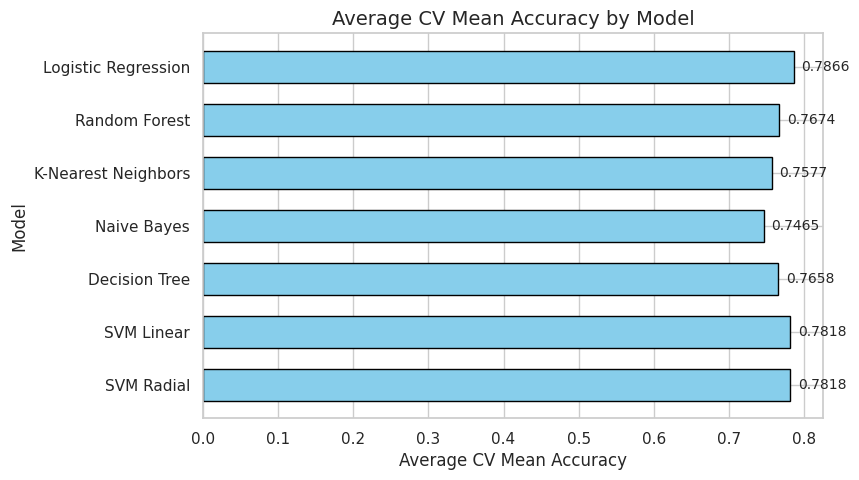

In [114]:
plt.figure(figsize=(8, 5))
plt.barh(accuracy_df['Model'], accuracy_df['CV_Mean'], color='skyblue', edgecolor='black', height=0.6)
plt.xlabel('Average CV Mean Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Average CV Mean Accuracy by Model', fontsize=14)
plt.gca().invert_yaxis()
for i, v in enumerate(accuracy_df['CV_Mean']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)
plt.show()

With the use of the confusion matrix, we may obtain a condensed result that illustrates where the model failed or which class the model predicted incorrectly.

### 7.3.1) Confusion Matrix

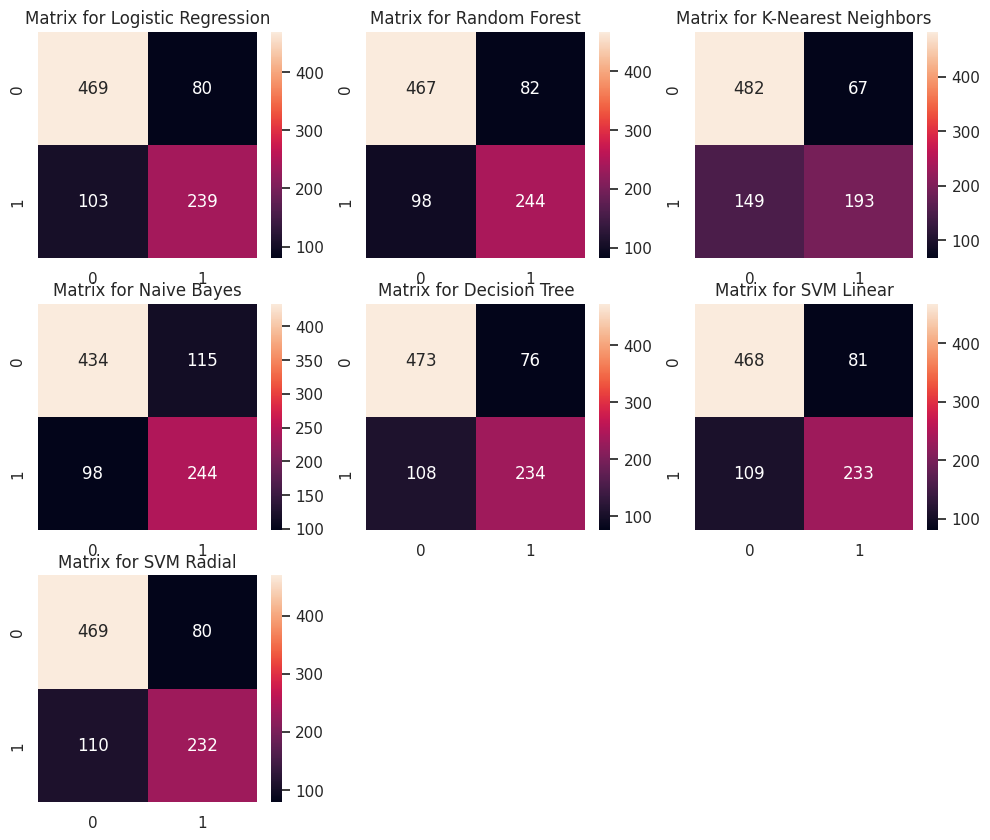

In [115]:
from sklearn.model_selection import cross_val_predict

# Calculating the no. of required subplots based on the number of models that i needed
num_models = len(models)
num_rows = (num_models - 1) // 3 + 1  # Rows needed
num_cols = min(num_models, 3)  # Columns needed

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for (model_name, model), ax in zip(models, axes.flatten()):
    y_pred = cross_val_predict(model, X, y, cv=10)
    conf_matrix = confusion_matrix(y, y_pred)
    sns.heatmap(conf_matrix, ax=ax, annot=True, fmt='2.0f')
    ax.set_title(f'Matrix for {model_name}')
    
for i in range(num_models, num_rows * num_cols):  # this function will remove any extra subplots
    fig.delaxes(axes.flatten()[i])
plt.show()

<div class="alert alert-block alert-info">
<b>Using Confusion Matrix to Interpret : </b> 

The left diagonal displays the percentage of accurate forecasts for each class, while the right diagonal displays the percentage of inaccurate guesses. Let's look at the first Logistic Regression-plot:

* 1) The total number of accurate predictions is 469 (for the deceased) plus 239 (for the living), with the mean CV accuracy being (469+232)/891 = 79.5%, which we did already obtain.
    

* 2) Mistakes: 80 survivors were incorrectly classified as dead and 103 deceased individuals as alive. As a result, by predicting the dead as survivors, it has committed more errors.
    

By examining all the matrices, we can conclude that Radial-SVM and Logistic Regression has a larger likelihood of correctly predicting passengers who died.
    
</div>


## 7.3.2) Hyperparameter Tunning

In [116]:
from sklearn.model_selection import GridSearchCV
param_grids = {
    'SVM (RBF Kernel)': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf'],
            'gamma': [0.1, 1, 'auto']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

best_models = {}
for model_name, config in param_grids.items():
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['param_grid'], cv=10, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_

accuracies = {}
for model_name, best_model in best_models.items():
    accuracy = best_model.score(X_test_scaled, y_test)
    accuracies[model_name] = accuracy

for model_name, accuracy in accuracies.items():
    print(f"{model_name}:")
    print(f"Best Hyperparameters: {best_models[model_name].get_params()}")
    print(f"Accuracy on Test Data: {accuracy}")
    print()

SVM (RBF Kernel):
Best Hyperparameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy on Test Data: 0.8582089552238806

Logistic Regression:
Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy on Test Data: 0.7947761194029851

Random Forest:
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split'

<div class="alert alert-block alert-info">
<b>Observations : </b> 

* We will be using these models with their best fit parameter since they are the most accurate models for classifiers, based on the scores Decision Tree of score 83.9% and SVM Radial of score 85.8%.
    
</div>

## 7.4) SVM - Radial

In [117]:
svm_rbf_model = SVC(C=1, kernel='rbf', gamma='auto')
svm_rbf_model.fit(X_train_scaled, y_train)
svm_rbf_predictions = svm_rbf_model.predict(X_test_scaled) # Predicted Data
svm_rbf_accuracy = (svm_rbf_predictions == y_test).mean()
print(f"SVM (RBF Kernel) Model Accuracy on Test Data: {svm_rbf_accuracy}")

SVM (RBF Kernel) Model Accuracy on Test Data: 0.8582089552238806


## 7.5) Decision Tree Model

In [118]:
decision_tree_model =DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=4, criterion='gini')
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled) # Predicted Data
decision_tree_accuracy = (decision_tree_predictions == y_test).mean()
print(f"Decision Tree Model Accuracy on Test Data: {decision_tree_accuracy}")

Decision Tree Model Accuracy on Test Data: 0.835820895522388


# **8) Model Testing**

In [119]:
testing_data_x= final_test.drop('PassengerId',axis=1)
scaler = StandardScaler()
testing_data_scaled = scaler.fit_transform(testing_data_x)

In [125]:
svm_rbf_predictions = svm_rbf_model.predict(testing_data_scaled)
decision_tree_predictions = decision_tree_model.predict(testing_data_scaled)

svm_rbf_submission = pd.DataFrame({
    "PassengerId": final_test["PassengerId"],  # Replace with the actual identifier column name
    "Survived": svm_rbf_predictions  # Replace with the predicted values
})

decision_tree_submission = pd.DataFrame({
    "PassengerId": final_test["PassengerId"],  # Replace with the actual identifier column name
    "Survived": decision_tree_predictions  # Replace with the predicted values
})

# Saving the submission files to CSV ( I will be submitting SVM-Radial from my side)

svm_rbf_submission.to_csv("submission.csv", index=False)
#decision_tree_submission.to_csv("decision_tree_submission.csv", index=False)

In [121]:
svm_rbf_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# **9) Project Summary**

1) **Age Distribution:** The age distribution of Titanic passengers reveals a diverse range, including infants, children, teenagers, young adults, and seniors. This variation suggests the need to categorize passengers into age groups for analysis.


2) **Gender Disparity:** The gender composition of passengers shows a significant gender disparity, with a higher number of males compared to females. This gender imbalance can be an important factor in predicting survival rates.


3) **Passenger Class:** The Titanic had passengers divided into three classes, with the majority in the third class (lower class). The distribution of passengers across classes can have implications for survival rates, as higher-class passengers may have had better access to lifeboats.


4) **Survival Rate by Age:** Analyzing the survival rates by age group reveals key trends. Children and babies had a notably higher survival rate, likely due to the "women and children first" policy during the evacuation. However, older passengers (seniors) had a lower survival rate, possibly due to physical limitations during the evacuation. Young adults exhibited varying survival rates.


5) **Title Engineering:** The creation of new features based on passenger titles (e.g., Mr., Mrs., Miss) allowed for a more granular categorization of passengers. This feature engineering improved model performance by considering the societal roles and gender associated with titles.


6) **Model Performance:** The project involved training and evaluating multiple machine learning models. Among these, the Support Vector Machine (SVM) with a radial kernel and the Decision Tree model emerged as the top-performing models for predicting passenger survival. These models were able to capture complex relationships in the data.


7) **Accuracy Scores:** The selected models achieved reasonable accuracy scores when making predictions on the test dataset. This indicates that the models had a predictive ability to classify passengers as survivors or non-survivors, though further improvements can always be explored.


8) **Cross-Validation:** Cross-validation played a crucial role in assessing the models' generalization performance. By dividing the training data into subsets and evaluating the model's performance on each subset, it helped identify potential overfitting and provided more robust estimates of model accuracy.


9) **Hyperparameter Tuning:** Hyperparameter tuning was employed to optimize model parameters and fine-tune their performance. Techniques like Grid Search allowed for systematic exploration of hyperparameter combinations to enhance model accuracy.


10) **Submission to Kaggle:** The final step of the project involved making predictions on the test dataset and preparing the results for submission to the Kaggle competition. This process demonstrated the practical application of the models for real-world predictions.

# Thank You for Exploring the Titanic Survival Prediction Project 🚢

I hope you have enjoyed my tour through the Titanic dataset using data analysis and machine learning. As a newcomer to the field of data science, I have learned a lot by working on this project. I got to dig into the interesting field of predictive modelling and it gave me insights on passenger demographics and survival factors.

Your support means the world to me, and if you thought this project was interesting and thought-provoking, please consider giving it an upvote. I'm motivated to keep studying and explore the fascinating topic of data science by your comments and encouragement.

Please don't hesitate to get in touch if you have any inquiries, recommendations, or concepts for next initiatives. I'm here to pick up knowledge and develop, and I can't wait to go on more data journeys with you.

**Connect with Me:**
- [LinkedIn](https://www.linkedin.com/in/evansajumathew/)
- [Portfolio](https://www.datascienceportfol.io/evansajumathew)
- [GitHub](https://github.com/evanmathew/Evan_Saju_Mathew)

Thank you for being a part of this incredible journey, and I look forward to sharing more data adventures with you as I continue my journey as a beginner in data science.

Happy Data Science, and Safe Voyages! 🌟